In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

In [1162]:
def get_font_family():
    import platform
    system_name = platform.system()
    
    if system_name == 'Darwin' :
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else :
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv
        
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = 'NanumBarunGothic'
    return font_family
plt.style.use('seaborn')
plt.rc('font', family=get_font_family())
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [1163]:
get_font_family()

'Malgun Gothic'

# 기사 크롤링

In [641]:
import os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import re
from datetime import datetime
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.select import Select

## 뉴스 기사 사이트 (빅카인즈) -> 3개월치

In [801]:
options = webdriver.ChromeOptions()
options.add_argument('headless')

In [1053]:
browser = webdriver.Chrome('C:/Users/dlrud/OneDrive - Sejong University/Self/Python/웹 크롤링 - fs/chromedriver.exe')
browser.maximize_window()
url = 'https://www.bigkinds.or.kr/'
browser.get(url)

C:\Users\dlrud\AppData\Local\Temp\ipykernel_23836\3615325761.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:/Users/dlrud/OneDrive - Sejong University/Self/Python/웹 크롤링 - fs/chromedriver.exe')


In [1054]:
browser.find_element(By.CLASS_NAME, 'search-key').send_keys('인플레이션')
browser.find_element(By.CLASS_NAME, 'search-key').send_keys(Keys.ENTER)

In [1055]:
browser.find_element(By.ID, 'collapse-step-1').click()

In [1056]:
# 처음 브라우저 킬시만 사용
browser.find_element(By.CLASS_NAME, 'tab-btn-inner' and 'tab1').click()

In [1057]:
date_start = input('검색할 시작 날짜 : ')
date_end = input('검색할 마지막 날짜 : ')

for i in range(10):
    browser.find_element(By.ID, 'search-begin-date').send_keys(Keys.BACK_SPACE)
browser.find_element(By.ID, 'search-begin-date').send_keys(date_start)
for i in range(10):
    browser.find_element(By.ID, 'search-end-date').send_keys(Keys.BACK_SPACE)
browser.find_element(By.ID, 'search-end-date').send_keys(date_end)

browser.find_element(By.CLASS_NAME, 'btn' and 'btn-search' and 'news-search-btn' and 'news-report-search-btn').click()
time.sleep(1)

select = Select(browser.find_element(By.ID, 'select2'))
select.select_by_value('100')

# 2022-10-16까지

검색할 시작 날짜 : 2022-10-12
검색할 마지막 날짜 : 2022-10-13


In [1061]:
news_list = []
count = browser.find_elements(By.CLASS_NAME, 'lastNum')[1].text
for c in range(4,int(count)):
    total_info = browser.find_element(By.ID, 'news-results')
    news = total_info.find_elements(By.CLASS_NAME,'news-item')
    
    for n in news:
        n.click()
        time.sleep(2)
        body = browser.find_element(By.CSS_SELECTOR, 'body')
        cc = body.find_element(By.CLASS_NAME, 'item1')
        bb = cc.find_element(By.CLASS_NAME,'info')
        news_date = bb.find_elements(By.TAG_NAME,'li')[0].text
        news_text = body.find_element(By.CLASS_NAME, 'news-view-body').text
        aa = browser.find_element(By.CLASS_NAME, 'news-view-head')
        news_title = aa.find_element(By.CLASS_NAME, 'title').text
        news_list.append([news_date, news_title, news_text])

        body.send_keys(Keys.ESCAPE)
        time.sleep(2)
        
    a1 = browser.find_elements(By.XPATH, '//*[@id="paging_news_result"]')
    if c+2 > 10 :
        a1[-2].send_keys(Keys.BACK_SPACE)
        
    a1[-2].send_keys(Keys.BACK_SPACE)
    a1[-2].send_keys(c+2)
    a1[-2].send_keys(Keys.ENTER)
    time.sleep(2)
    

In [1062]:
df = pd.DataFrame(news_list, columns=['날짜', '제목', '내용'])

In [1063]:
df_result = df_result.append(df)

C:\Users\dlrud\AppData\Local\Temp\ipykernel_23836\2961200697.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df)


In [1064]:
df_result.reset_index(drop=True,inplace=True)
df_result = df_result.drop_duplicates()
df_result.tail(10)

,날짜,제목,내용
8285,2022-10-12,"LG엔솔, 혼다와의 합작공장을 美 오하이오주에 건립",LG에너지솔루션과 일본의 완성차 업체 혼다의 합작법인이 미국에 건설할 배터리 공장 ...
8286,2022-10-12,"IMF ""글로벌 금융 안정성 위험 증가...폭풍 구름 엄습하고 있어""","국제통화기금, IMF는 글로벌 금융 안정성의 위험이 증가하고 있다고 경고했습니다.\..."
8287,2022-10-12,[강원포럼]강원 인플레이션이 타지보다 높은 이유,최재용 한국은행 강원본부장\n최근 전세계적으로 가장 많이 회자되는 경제이슈를 하나만...
8288,2022-10-12,IMF “생계비 위기” 내년 물가 세계 6.5% 한국 3.8% 전망,그래픽=김영옥 기자 yesok@joongang.co.kr\n“폭풍우(storm cl...
8289,2022-10-12,노벨경제학상 버냉키의 경고 “강달러에 신흥국 자본유출 위기”,벤 버냉키\n“아시아 등 신흥 시장이 매우 강한 달러 때문에 자본 유출 위기에 직면...
8290,2022-10-12,[사설]“아직 최악 아니다”… IMF가 예고한 암울한 내년 경제,크리스탈리나 게오르기에바 국제통화기금(IMF) 총재(오른쪽)가 10일(현지 시간) ...
8291,2022-10-12,[정인교 칼럼] 中의 반도체 굴기 꺾이나,"인하대 국제통상학과\n지난주 금요일 미국 상무부 산업안보국(BIS)은 첨단 반도체,..."
8292,2022-10-12,당국이 낙관편향에 빠질 때 위기는 온다[한국의 창(窓)],"ⓒ게티이미지뱅크, AFP\n◇위기 수준에 접근하고 있는 외환·금융지표낙관적 감세정책..."
8293,2022-10-12,[사설] ‘수출 부진·물가 상승’ 경고음 높아지는 한국경제,"KDI·IMF 엄중한 상황 잇따라 진단, 취약계층 살피며 중장기 전략 펴야\n올해 ..."
8294,2022-10-12,[참성단] 파운드화(貨) 위기,고물가와 경기침체에 세계가 몸살을 앓고 있다. 이런 미증유의 딜레마 상황을 해결할 ...


In [1065]:
df_result['날짜'].unique()

array(['2022-11-22', '2022-11-21', '2022-11-20', '2022-11-19',
       '2022-11-18', '2022-11-17', '2022-11-16', '2022-11-15',
       '2022-11-14', '2022-11-13', '2022-11-12', '2022-11-11',
       '2022-11-10', '2022-11-09', '2022-11-08', '2022-11-07',
       '2022-11-06', '2022-11-05', '2022-11-04', '2022-11-03',
       '2022-11-02', '2022-11-01', '2022-10-31', '2022-10-30',
       '2022-10-29', '2022-10-28', '2022-10-27', '2022-10-26',
       '2022-10-25', nan, '2022-10-24', '2022-10-23', '2022-10-22',
       '2022-10-21', '2022-10-20', '2022-10-19', '2022-10-18',
       '2022-10-17', '2022-10-16', '2022-10-09', '', '2022-10-08',
       '2022-10-05', '2022-10-04', '2022-10-02', '2022-10-01',
       '2022-10-07', '2022-10-06', '2022-10-14', '2022-10-15',
       '2022-10-03', '2022-10-11', '2022-10-10', '2022-10-13',
       '2022-10-12'], dtype=object)

## train 데이터 가져오기

In [ ]:
train = pd.read_excel('train.xlsx')
train = train[['일자', '제목', '통합 분류1', '통합 분류2', '통합 분류3']]

## 데이터 전처리

In [1071]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', str(text))
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-z]', ' ', str(text))
    text = re.sub('[\s]+', ' ', str(text))
    text = str(text).lower()
    return text

In [1072]:
df_result['전처리 제목'] = df_result['제목'].map(preprocessing)

In [1134]:
train['제목'] = train['제목'].map(preprocessing)

In [ ]:
train['토픽1'] = train['통합 분류1'].map(lambda x : x.split('>')[0])

## 불용어 처리

In [1104]:
# 불용어 가져오기
stopwords = pd.read_excel('불용어.xlsx')
stopwords = stopwords['아'].tolist()
stopwords.append('아')

In [1106]:
def remove_stopwords(text):
    tokens = str(text).split(' ')
    meaningful_words = [w for w in tokens if not w in stopwords]
    return ' '.join(meaningful_words)

In [1107]:
train['제목'] = train['제목'].map(remove_stopwords)

In [1137]:
df_result['전처리 제목'] = df_result['전처리 제목'].map(remove_stopwords)

In [1115]:
train['토픽1'].unique()

array(['경제', '스포츠', '국제', '정치', '문화', 'IT_과학', '미분류', '사회', '지역'],
      dtype=object)

In [1123]:
dic = {'경제' : 0, '스포츠' : 1, '국제':2, '정치':3, '문화':4, 'IT_과학':5, '사회':6, '지역':7}

topic = pd.DataFrame(data=dic.values(), index=dic.keys(), columns=['토픽'])

In [1153]:
train.dropna(inplace=True)

In [1126]:
train = train.merge(topic, how='left', left_on='토픽1', right_on=topic.index)

In [1127]:
train

,일자,제목,통합 분류1,통합 분류2,통합 분류3,토픽1,토픽
0,20220930,"엔화 매수 나섰지만 마이너스 금리는 유지 日, 엔低 막으려 24년 만에 시장 개입",경제>외환,국제>일본,NaN,경제,0.0
1,20220930,"거스를 수 없는 ‘넷제로’ 사장님, 아직도 고민 중?",경제>자원,경제>유통,경제>자동차,경제,0.0
2,20220930,대중제 골프장 그린피 내릴까,스포츠>골프,경제>부동산,경제>자동차,스포츠,1.0
3,20220930,‘인플레 감축법’ 일파만파 한국의 묘수는 어디에,국제>미국_북미,경제>무역,경제>국제경제,국제,2.0
4,20220930,일본 증시로 돈 몰린다 WHY?,국제>일본,경제>증권_증시,경제>외환,국제,2.0
...,...,...,...,...,...,...,...
19215,20220701,"[사설] 재고 비상, 전방위 내수 촉진책으로 ‘R의 악순환’ 막아라",경제>국제경제,경제>증권_증시,경제>취업_창업,경제,0.0
19216,20220701,[사설]늘어나는 ‘빚더미 청년’ 개인회생 제도 정비 시급하다,경제>금융_재테크,경제>부동산,경제>외환,경제,0.0
19217,20220701,"해운물류시장 ‘삼각파도’ 조짐 “정부, 선제 대응 나서야”",경제>유통,경제>외환,경제>증권_증시,경제,0.0
19218,20220701,내 집인 듯 내 집 아닌 내 집 같은 집 올여름 구역 인싸는,경제>유통,문화>요리_여행,경제>서비스_쇼핑,경제,0.0


## 워드클라우드

In [1109]:
from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path =r'C:\Windows\Fonts\malgun.ttf',
        width=width, height=height,
        stopwords=['합니다', '입니다'],
        background_color='white',
        random_state=42
    )
    word_draw.generate(data)
    plt.figure(figsize=(15,7))
    plt.imshow(word_draw)
    plt.axis('off')
    plt.show()

In [1110]:
content = ' '.join(train['제목'].tolist())

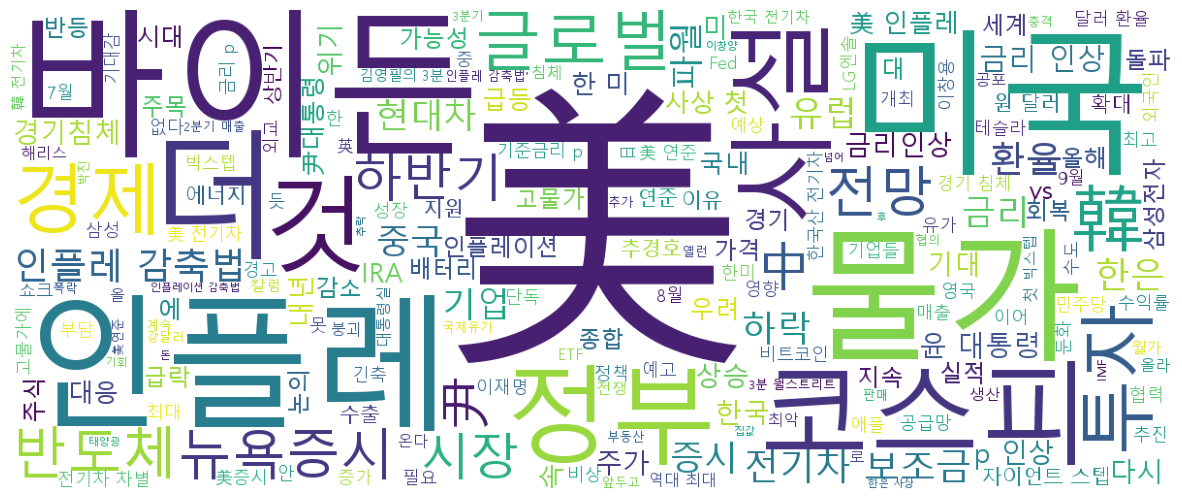

In [1111]:
display_word_cloud(content)

## 벡터화

In [1154]:
y_train = train['토픽']

In [1155]:
from sklearn.feature_extraction.text import CountVectorizer

X_train_text = train['제목']
y_train_text = train['토픽1']
X_test_text = df_result['전처리 제목']

cvect = CountVectorizer(max_df=1.0, min_df=0.01)
cvect.fit(X_train_text)

CountVectorizer(min_df=0.01)

In [1156]:
X_test_text

0            글로벌 tv시장 분기 연속 축소 삼성 lg 위 유지
1        [기업] lg화학 테네시주 조 투자 배터리 부품 공장 건설
2          lg화학 테네시주에 연간 만 톤 규모 양극재 공장 추진
3              대통령 숨가쁜 일정 속 의미 있는 성과 있었다 
4       lg화학 미국 테네시주에 연간 만t 규모 양극재 공장 짓는다
                      ...                
8290    [사설] 아직 최악 아니다 imf가 예고한 암울한 내년 경제
8291                  [정인교 칼럼] 반도체 굴기 꺾이나
8292          당국이 낙관편향에 빠질 위기는 온다[한국의 창 ]
8293       [사설] 수출 부진 물가 상승 경고음 높아지는 한국경제
8294                        [참성단] 파운드화 위기
Name: 전처리 제목, Length: 8237, dtype: object

In [1157]:
X_train = cvect.transform(X_train_text)
X_test = cvect.transform(X_test_text)

X_train.shape, X_test.shape

((15740, 72), (8237, 72))

## 모델링 (분류 - 의사결정나무)

In [1128]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)

In [1158]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [1160]:
feature_names = cvect.get_feature_names_out()
feature_names

array(['ira', '가격', '가능성', '감축법', '개월', '경기', '경기침체', '경제', '고물가', '글로벌',
       '금리', '금리인상', '급등', '기업', '기준금리', '나스닥', '내년', '년만에', '뉴욕증시', '달러',
       '대응', '대통령', '돌파', '마감', '만에', '매출', '물가', '미국', '바이든', '반도체',
       '배터리', '보조금', '분기', '빅스텝', '사상', '사설', '삼성전자', '상반기', '상승', '세계',
       '수출', '스텝', '시장', '실적', '앞두고', '역대', '연속', '연준', '우려', '유럽', '인상',
       '인플레', '인플레이션', '자이언트', '전기차', '전망', '정부', '중국', '증시', '최고', '최대',
       '침체', '코스피', '투자', '파월', '하락', '하반기', '한국', '한미', '한은', '현대차',
       '환율'], dtype=object)

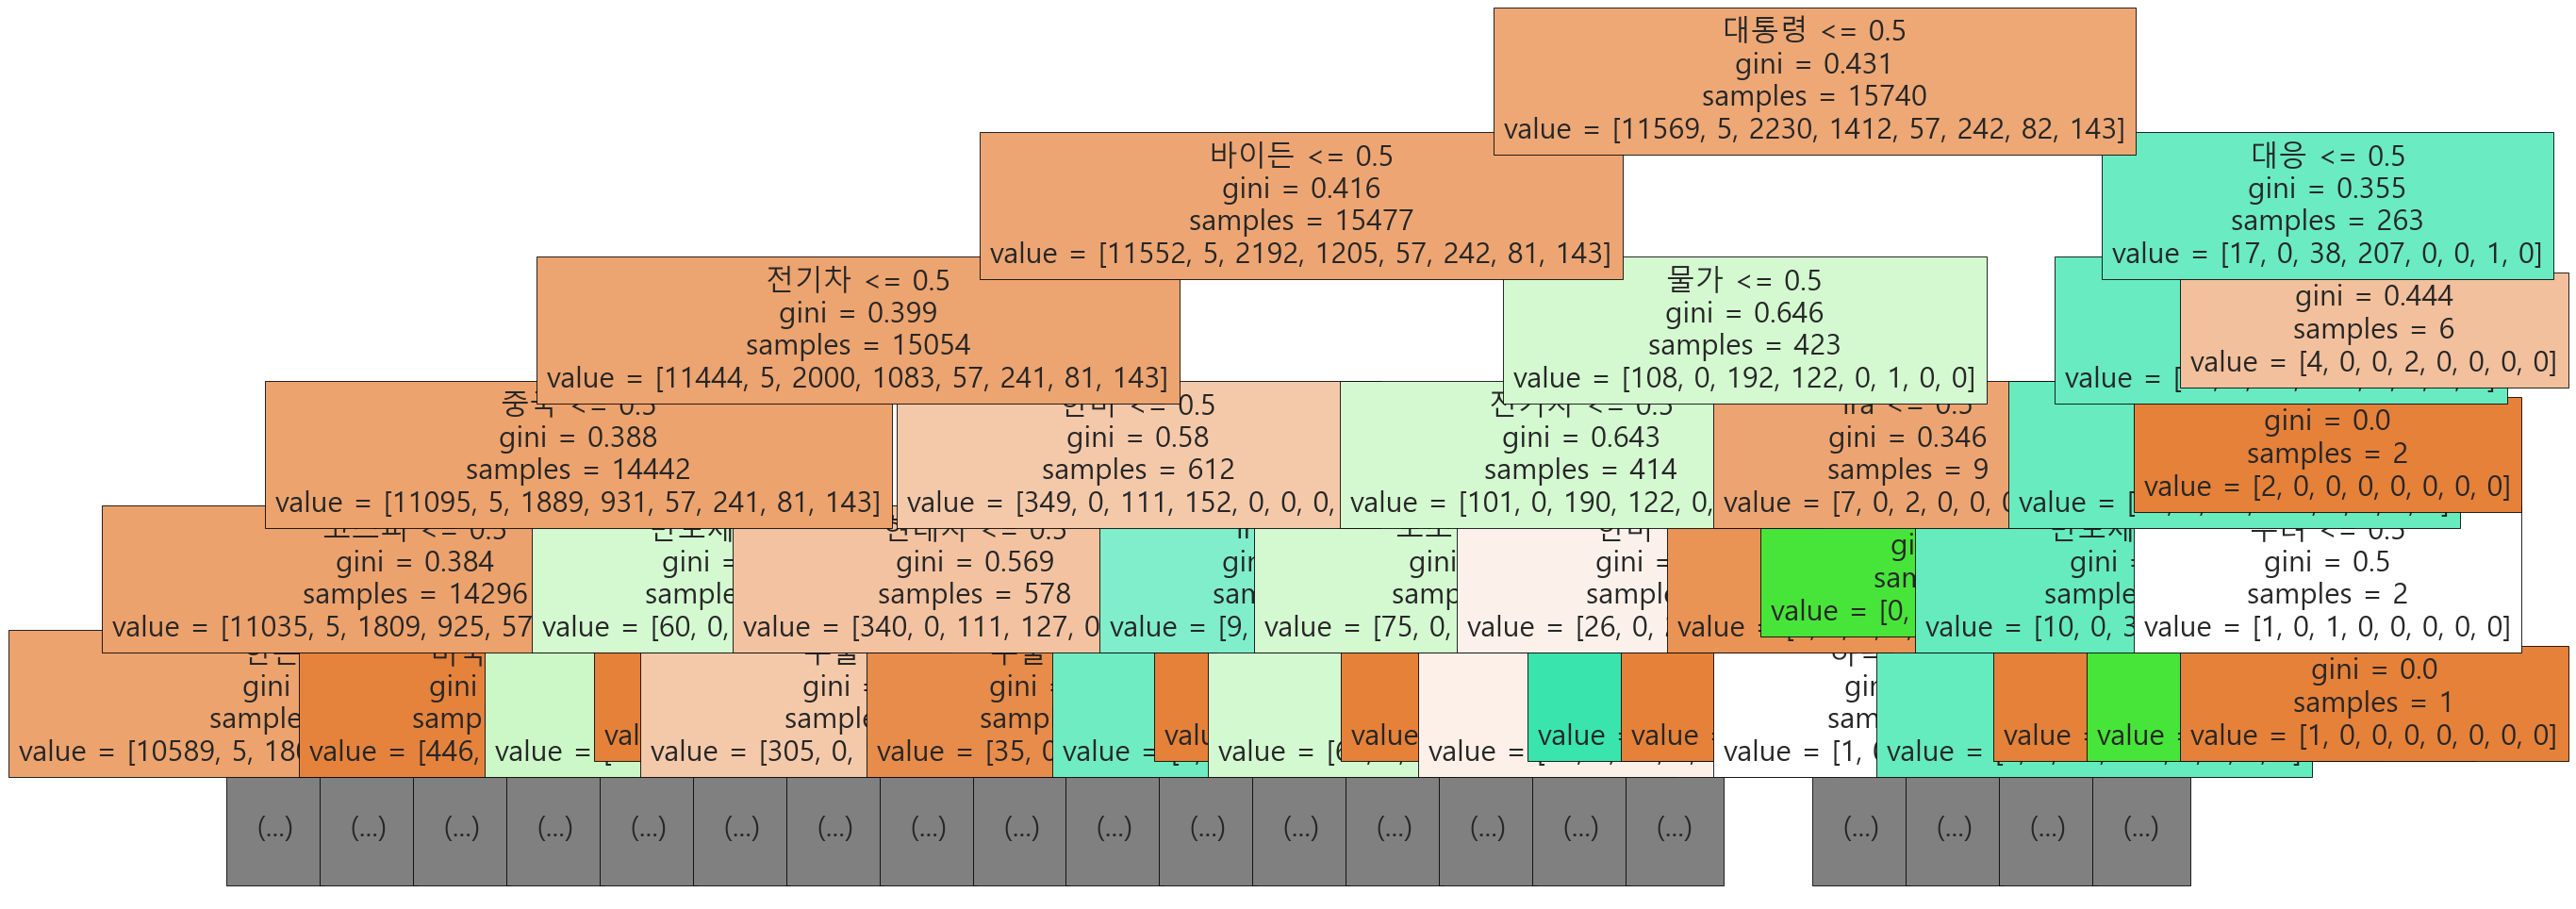

In [1164]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,6))
plot_tree(model, max_depth=5, feature_names=feature_names, fontsize=11, filled=True)
plt.show()

In [1165]:
fim = pd.Series(model.feature_importances_)
fim.index = feature_names
fim_large = fim.nlargest(50)

<AxesSubplot:>

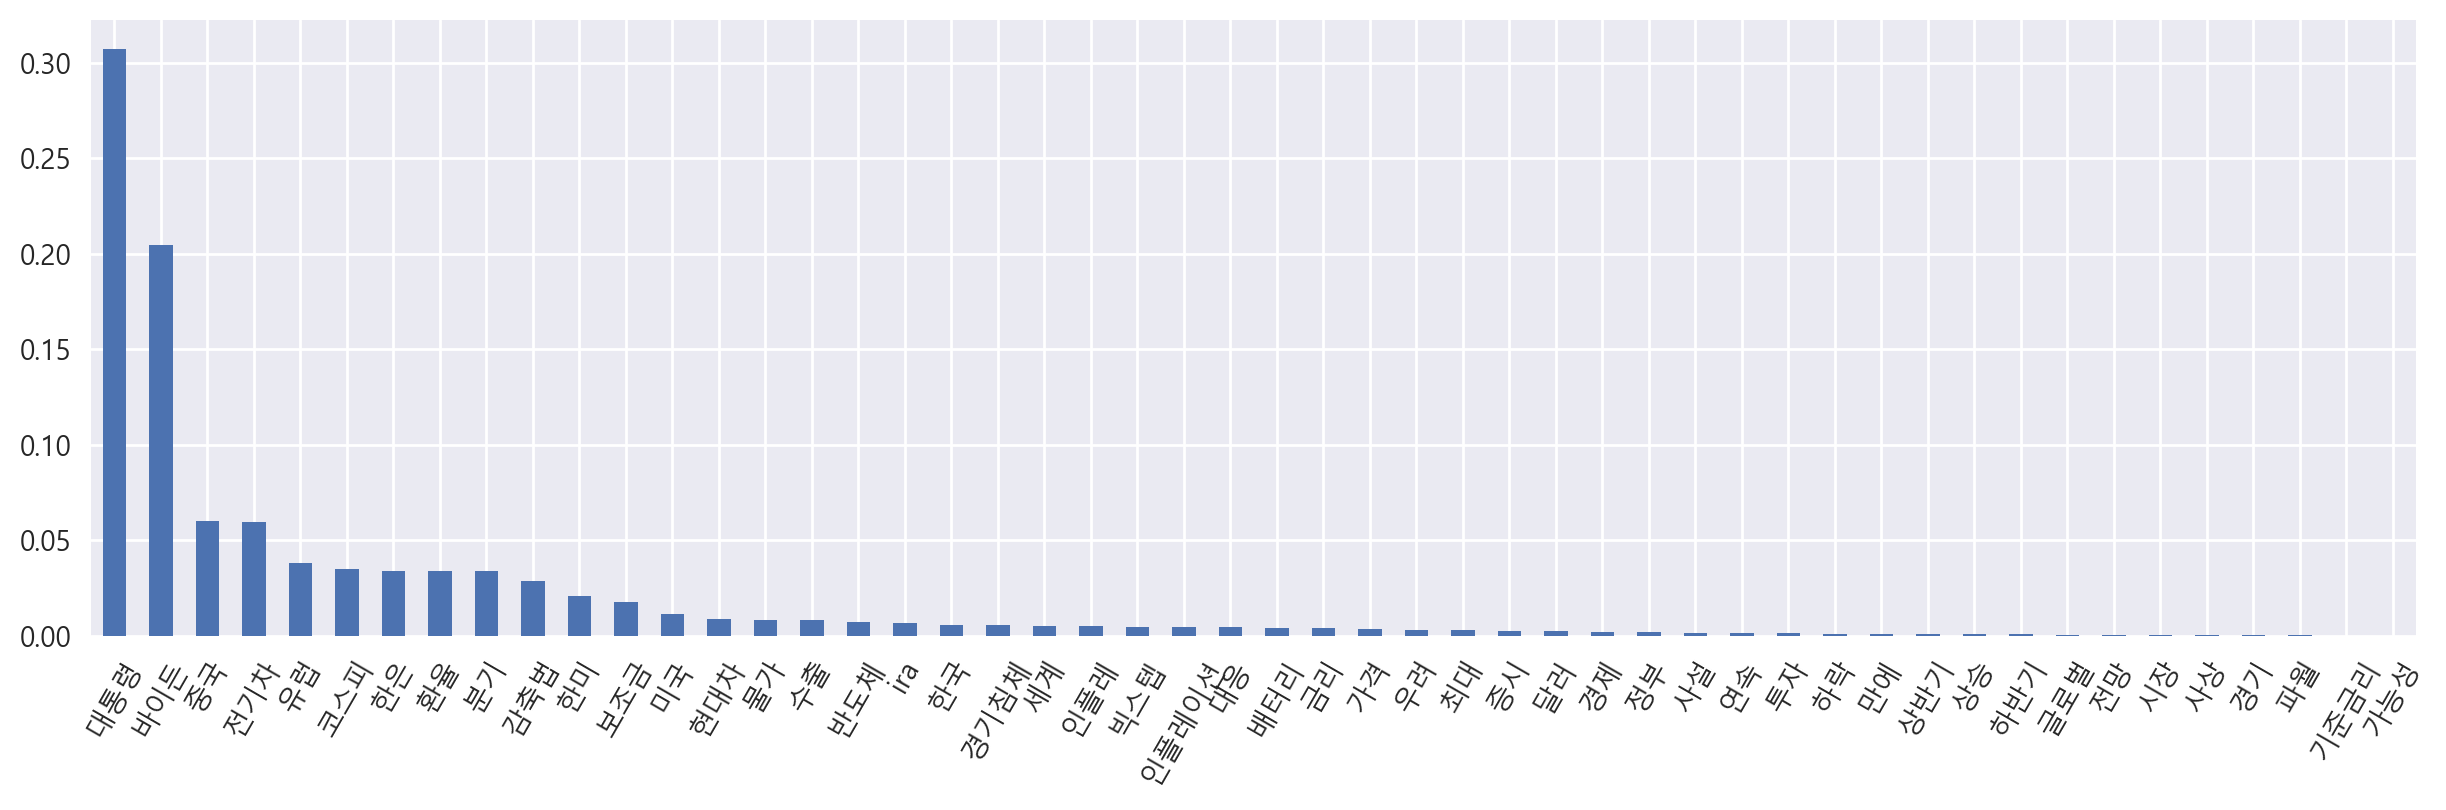

In [1166]:
fim_large.plot.bar(rot=60, figsize=(15,4))

## 예측

In [1167]:
pred = model.predict(X_test)

In [1168]:
pd.Series(pred).value_counts()

0.0    7786
2.0     372
3.0      78
5.0       1
dtype: int64

In [1169]:
topic

,토픽
경제,0
스포츠,1
국제,2
정치,3
문화,4
IT_과학,5
사회,6
지역,7
